# Python-Beispiele für RIS-API

This notebook contains some examples to show how to work with the RIS API.
Dieses Notebook beinhaltet einige Python-Beispiele, die zeigen, wie man mit der RIS-API arbeiten kann.

Inhaltsverzeichnis:

1. [Mitglieder einer Partei](#Mitglieder-einer-Partei)
1. [Gemeinderats-Geschäfte](#Gemeinderats-Geschäfte)

In [1]:
import requests
from pprint import pprint
import pandas as pd
import random

## Mitglieder einer Partei

Um alle Mitglieder einer Partei zu bekommen, müssen folgende Abfragen gemacht werden:
    
    1. ID der Partei holen
    1. Suche nach Mitgliedern der Partei (mit dieser ID)
    1. *Optional:* Detail-Informationen eines Mitglieds holen
    
    

### Alle Parameter holen

In [2]:
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/parameter', headers=headers)
params = r.json()

In [6]:
# get id of random party
parties = params['Parteien']
party = random.choice(parties)
party

{u'Id': u'0a8eb90f-6d09-47ac-99fe-ab97a77d4954', u'Name': u'GLP'}

### Mitglieder der Partei abfragen

In [7]:
query = {'parteiId': party['Id']}
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/suchen', params=query, headers=headers)
members = r.json()
members

[{u'Id': u'32e89ef8-f5b2-46e5-aafe-7dd15929f00a',
  u'Name': u'Baumann',
  u'Partei': u'GLP',
  u'Titel': None,
  u'Vorname': u'Markus',
  u'Wahlkreis': u' 9',
  u'WahlkreisOrderBy': 105},
 {u'Id': u'6a6e0c52-3ae0-48d3-b7d3-a9412dad103b',
  u'Name': u'Garcia',
  u'Partei': u'GLP',
  u'Titel': None,
  u'Vorname': u'Isabel',
  u'Wahlkreis': u' 3',
  u'WahlkreisOrderBy': 101},
 {u'Id': u'a0692db6-12d8-462b-a02d-b3b3f3045551',
  u'Name': u'Hofer Frei',
  u'Partei': u'GLP',
  u'Titel': None,
  u'Vorname': u'Simone',
  u'Wahlkreis': u' 6',
  u'WahlkreisOrderBy': 103},
 {u'Id': u'fb3c8de1-8a1d-48f0-a0c1-81de7a118740',
  u'Name': u'H\xfcni',
  u'Partei': u'GLP',
  u'Titel': None,
  u'Vorname': u'Guido',
  u'Wahlkreis': u'4 und 5',
  u'WahlkreisOrderBy': 102},
 {u'Id': u'aa77152d-5fde-4725-8c69-21c022000ec8',
  u'Name': u'Krayenb\xfchl',
  u'Partei': u'GLP',
  u'Titel': u'',
  u'Vorname': u'Guy',
  u'Wahlkreis': u'1 und 2',
  u'WahlkreisOrderBy': 100},
 {u'Id': u'6f80de0e-2322-46c4-891b-3a2781b

### Details der Mitglieder abfragen

Mit dem `/Mitglieder/details` Endpunkt können Details eines Mitglieds abgefragt werden:

In [8]:
def get_member_details(member):
    query = {'mid': member['Id']}
    headers = {'Accept': 'application/json'}
    r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/details', params=query, headers=headers)
    details = r.json()
    # trim "Wahlkreis" and "Wohnkreis" since they have a padding
    details['Wahlkreis'] = details['Wahlkreis'].strip()
    if details['Wohnkreis']:
        details['Wohnkreis'] = details['Wohnkreis'].strip()
    # add original member to keep WahlkreisOrderBy column
    details.update(member)
    return details
    
member_details = [get_member_details(m) for m in members]
df = pd.DataFrame(member_details)
df

,Adressen,Anrede,Beruf,EmailGeschaeftlich,EmailPrivat,Fraktion,Geburtstag,GruppenMitgliedschaften,Id,Interessenverbindungen,...,NameInUrl,Partei,Sitznummer,TelefonGeschaeftlich,TelefonPrivat,Titel,Vorname,Wahlkreis,WahlkreisOrderBy,Wohnkreis
0,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Herr,Fachmann für Arbeitsintegration/Job Coach,,baumann-markus@bluewin.ch,GLP,1973-09-19T00:00:00,"[{u'Von': u'2014-05-07T00:00:00', u'Id': u'421...",32e89ef8-f5b2-46e5-aafe-7dd15929f00a,None,...,Markus%20Baumann,GLP,None,None,None,None,Markus,9,105,None
1,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Frau,Politologin & Kommunikationsberaterin,,garciaisabel_@hotmail.com,GLP,1963-06-15T00:00:00,"[{u'Von': u'2010-05-19T00:00:00', u'Id': u'421...",6a6e0c52-3ae0-48d3-b7d3-a9412dad103b,"- Secondas Zürich, Präsidentin",...,Isabel%20Garcia,GLP,None,,,None,Isabel,3,101,3
2,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Frau,Redaktorin / Ökonomin (lic. rer. pol.),simone.hofer@econtext.ch,simone.hofer@econtext.ch,GLP,1974-12-16T00:00:00,"[{u'Von': u'2019-04-27T00:00:00', u'Id': u'421...",a0692db6-12d8-462b-a02d-b3b3f3045551,"- LAC TV Unterstrass, Zürich, Trainerin\r- Vét...",...,Simone%20Hofer%20Frei,GLP,None,None,,None,Simone,6,103,6
3,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Herr,Umweltnaturwissenschafter / Projekt Leiter,,guidohueni@hotmail.com,GLP,1973-01-27T00:00:00,"[{u'Von': u'2012-02-02T00:00:00', u'Id': u'421...",fb3c8de1-8a1d-48f0-a0c1-81de7a118740,,...,Guido%20H%c3%bcni,GLP,None,,056 210 00 86,None,Guido,4 und 5,102,3
4,"[{u'Plz': u'', u'Ort': u'', u'Addressart': u'P...",Herr,Staatsanwalt,,mail@guykrayenbuehl.ch,GLP,1968-01-29T00:00:00,"[{u'Von': u'2015-10-20T00:00:00', u'Id': u'421...",aa77152d-5fde-4725-8c69-21c022000ec8,None,...,Guy%20Krayenb%c3%bchl,GLP,None,044 248 21 11,None,,Guy,1 und 2,100,3
5,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Frau,Pflegefachfrau HF,None,maleika.landolt@vtxmail.ch,GLP,1967-06-05T00:00:00,"[{u'Von': u'2010-05-19T00:00:00', u'Id': u'421...",6f80de0e-2322-46c4-891b-3a2781b127c9,"- Rotkreuzdienst Schweiz, Bern, OGfr. RKD+\r- ...",...,Maleica%20Landolt,GLP,None,044 811 07 77,043 300 12 60,None,Maleica,11,107,11
6,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Herr,Bau- und Wirtschaftsingenieur FH,,markus.merki@hotmail.com,GLP,1977-10-04T00:00:00,"[{u'Von': u'2014-05-07T00:00:00', u'Id': u'421...",09fccfe6-c6e3-487e-8efc-4db1e8af3d8f,"- Grünliberale Kreis 11 & 12, Vorstandsmitglie...",...,Markus%20Merki,GLP,None,,None,None,Markus,11,107,11
7,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Herr,"Rechtsanwalt, Head Public Affairs",,pirmin.meyer@protonmail.ch,GLP,1976-11-19T00:00:00,"[{u'Von': u'2017-03-01T00:00:00', u'Id': u'421...",178260bc-b46e-460b-bd3f-f80ae421c468,"- glp lab – das offene Politlabor, Zürich, Vor...",...,Pirmin%20Meyer,GLP,None,044 628 66 79,None,None,Pirmin,3,101,9
8,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Herr,wissenschaftlicher Mitarbeiter / Dozent,,,GLP,1959-12-13T00:00:00,"[{u'Von': u'2018-05-16T00:00:00', u'Id': u'421...",f5ae2bc7-e3c4-4f2e-96b8-0b4c1abbb87d,None,...,Christian%20Monn,GLP,None,,,Dr.,Christian,12,108,11
9,"[{u'Plz': None, u'Ort': None, u'Addressart': u...",Frau,Dozentin,None,ann-catherine.nabholz@grunliberale.ch,GLP,1968-04-18T00:00:00,"[{u'Von': u'2010-05-19T00:00:00', u'Id': u'421...",162e20b7-31de-46ef-b520-0021c3e269cb,"- Theater Neumarkt AG, Mitglied Verwaltungsrat",...,Ann-Catherine%20Nabholz,GLP,None,None,043 488 69 85,Dr.,Ann-Catherine,7 und 8,104,7


### Diagramm aller Mitglieder einer Partei nach Wahlkreis

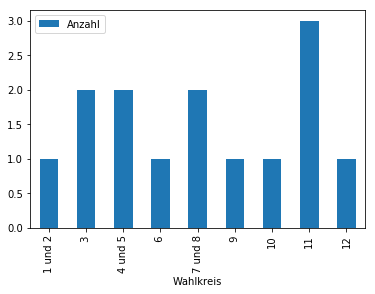

In [10]:
count_by_wahlkreis = df[['Wahlkreis', 'WahlkreisOrderBy']].groupby(['Wahlkreis', 'WahlkreisOrderBy']).size().reset_index(name='Anzahl')
count_by_wahlkreis = count_by_wahlkreis.sort_values(by=['WahlkreisOrderBy'])
count_by_wahlkreis.plot.bar(x='Wahlkreis', y='Anzahl')

## Gemeinderats-Geschäfte